# Can MAP predict and improve CAASPP scores?

As a veteran teacher of 9 years at The Academy of Alameda, I have a deep interest in the success of my students. We are an accredited school that strives to serve our community. However, in the most recent years, we have been flagged by the state in the area of assessment scores for our students with disabilities. In the last two years, the test scores of our students with disabilities have decreased.  The data I have collected comes from the seventh grade students at the Academy of Alameda Middle School. The information I have gathered is centered around test scores and demographic data. The demographic categories include, gender, race, socioeconomic status, learning disability status and parent education level. The test score data I’ve collected includes results from the state standardized assessment, CAASPP (California Assessment of Student Performance and Progress) and our school implemented diagnostic and growth assessment, MAP (Measures of Academic Progress).

For the last 6 years, we have used the MAP assessment for class placement and to track progress from fall to spring. Recently, I've been asked to work on progress monitoring of our students in intervention classes (designed for students below and far below grade level), which often include our students with disabilities. The two variables I'm focusing my research on is the "Spring MAP Math RIT" and "CAASPP Scale Score". To get a better understanding of the student population, I've included some visuals of the demographic data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('class_of_21_no_names.csv')
data.head()

,PermID,CAASPP Scale Score,CAASPP Achievement Level,Spring MAP Math RIT,Spring MAP Math %,Fall MAP Math RIT,Fall MAP Math %,Gender,Section 504 Status,Primary Disability Type,...,Parent Education Level,Accommodations Available Indicator,Designated Support Available Indicator,CAASPP Scale Score Reading,CAASPP Achievement Level Reading,Spring MAP Reading RIT,Spring MAP Reading %,Fall MAP Reading RIT,Fall MAP Reading %,Intervention
0,89253,2235,1,199,6,193,6,Male,No,NaN,...,11,No,No,2247.0,1.0,194.0,7.0,164.0,1.0,No
1,89071,2248,1,199,6,190,4,Male,No,OHI,...,11,Yes,Yes,2340.0,1.0,192.0,5.0,190.0,8.0,No
2,89072,2279,1,186,1,188,3,Female,No,NaN,...,13,No,No,2341.0,1.0,NaN,NaN,187.0,5.0,No
3,89225,2296,1,190,2,180,1,Male,No,NaN,...,15,No,No,2371.0,1.0,197.0,10.0,189.0,7.0,No
4,89264,2299,1,192,2,172,1,Female,No,OHI,...,12,No,Yes,2390.0,1.0,204.0,21.0,191.0,9.0,No


In [3]:
data["MAP Math Growth"] = data["Spring MAP Math RIT"] - data["Fall MAP Math RIT"]

In [4]:
data.shape

(167, 35)

In [5]:
data.isnull().sum()

PermID                                         0
CAASPP Scale Score                             0
CAASPP Achievement Level                       0
Spring MAP Math RIT                            0
Spring MAP Math %                              0
Fall MAP Math RIT                              0
Fall MAP Math %                                0
Gender                                         0
Section 504 Status                             0
Primary Disability Type                      148
English Language Acquisition Status            0
RFEP Date                                    135
Military Status                                0
Homeless Status                                0
Economic Disadvantage Status                   0
Hispanic or Latino                             9
American Indian or Alaska Native               9
Asian                                          9
Native Hawaiian or Other Pacific Islander      9
Filipino                                       9
Black or African Ame

In [6]:
ethnicity_mapping = {'200.0':'Asian', '300.0':'Native Hawaiian or other Pacific', '400.0':'Filipino', '500.0':'Hispanic or Latino', '600.0':'Black or African American', '700.0':'White', '800.0':'Two or more races', 'nan':'Declined to state'}

In [7]:
data['Reporting Ethnicity']=data['Reporting Ethnicity'].astype('str')

In [8]:
import numpy as np
data['Ethnicity'] = data['Reporting Ethnicity'].apply(lambda key: '' if key is np.nan else ethnicity_mapping[key])

In [9]:
parent_education_mapping = {10 : 'Graduate school or higher', 11 : 'College graduate', 12 : 'Some college', 13 : 'High school graduate', 14 : 'Not a high school graduate', 15 : 'Declined to state'}

In [10]:
data['Parent Education'] = data['Parent Education Level'].apply(lambda key: '' if key is np.nan else parent_education_mapping[key])

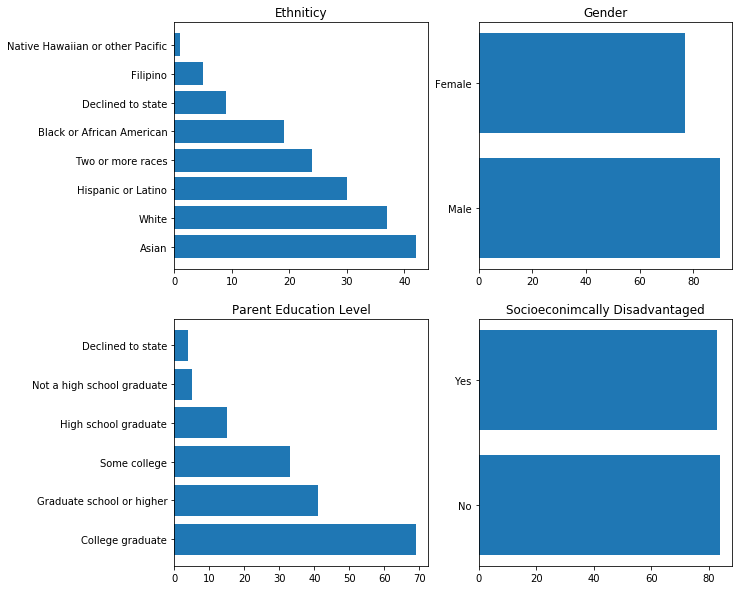

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,2)
genders = (data['Gender'].value_counts().index)
plt.barh(genders, data['Gender'].value_counts())
plt.title("Gender")

plt.subplot(2,2,1)
ethnicities = (data['Ethnicity'].value_counts().index)
plt.barh(ethnicities, data['Ethnicity'].value_counts())
plt.title("Ethniticy")

plt.subplot(2,2,4)
status = (data['Economic Disadvantage Status'].value_counts().index)
plt.barh(status, data['Economic Disadvantage Status'].value_counts())
plt.title("Socioeconimcally Disadvantaged")

plt.subplot(2,2,3)
levels = (data['Parent Education'].value_counts().index)
plt.barh(levels, data['Parent Education'].value_counts())
plt.title("Parent Education Level")
plt.show()

## Are the distributions for MAP and CAASPP normal?

I want to get a better understanding of the distribution for each data set. I wondered if each set of scores showed similar spread or shape and if the data was normal. Below, I've calculated the summary statistics on both sets of data and used a histogram to visualize. 

In [12]:
#Raw MAP score 7th grade average 224
data['Spring MAP Math RIT'].describe()

count    167.000000
mean     222.958084
std       16.359793
min      170.000000
25%      214.000000
50%      223.000000
75%      234.000000
max      272.000000
Name: Spring MAP Math RIT, dtype: float64

In [13]:
#ca state average 2511
data['CAASPP Scale Score'].describe()

count     167.000000
mean     2526.808383
std       101.884291
min      2235.000000
25%      2466.500000
50%      2527.000000
75%      2598.500000
max      2748.000000
Name: CAASPP Scale Score, dtype: float64

In [14]:
#Project growth for average students is 10-12
data['MAP Math Growth'].describe()

count    167.000000
mean       6.898204
std        6.269677
min       -8.000000
25%        3.000000
50%        7.000000
75%       11.000000
max       25.000000
Name: MAP Math Growth, dtype: float64

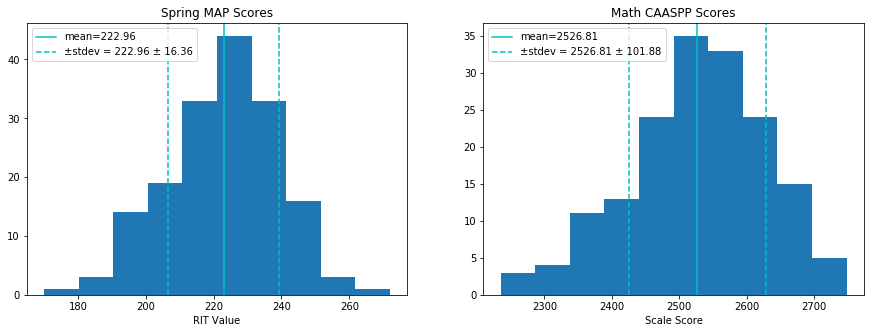

In [15]:
plt.figure(figsize=(15, 5))
map_mean = data["Spring MAP Math RIT"].mean()
map_stdev = data["Spring MAP Math RIT"].std()

caaspp_mean = data['CAASPP Scale Score'].mean()
caaspp_stdev = data['CAASPP Scale Score'].std()


plt.subplot(1,2,1)
plt.hist(data['Spring MAP Math RIT'])
plt.title('Spring MAP Scores')
plt.xlabel('RIT Value')
plt.axvline(map_mean, color='c', linestyle='solid', label=f'mean={map_mean:.2f}')
plt.axvline(map_mean + map_stdev, color='c', linestyle='dashed', label=f"±stdev = {map_mean:.2f} ± {map_stdev:.2f}")
plt.axvline(map_mean - map_stdev, color='c', linestyle='dashed')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data['CAASPP Scale Score'])
plt.title('Math CAASPP Scores')
plt.xlabel('Scale Score')
plt.axvline(caaspp_mean, color='c', linestyle='solid', label=f'mean={caaspp_mean:.2f}')
plt.axvline(caaspp_mean + caaspp_stdev, color='c', linestyle='dashed', label=f"±stdev = {caaspp_mean:.2f} ± {caaspp_stdev:.2f}")
plt.axvline(caaspp_mean - caaspp_stdev, color='c', linestyle='dashed')
plt.legend()
plt.show()

Looking at the two histograms, the distribution appears to be normal and they both have a similar shape. Since these are two different tests with different scales, I wanted to go a step further and make a QQ plot to more closely examine the distribution. 

In [16]:
norm = np.random.normal(0, 1, 168)
norm.sort()
caaspp_list = data["CAASPP Scale Score"].tolist()
caaspp_list.sort()

In [17]:
norm = np.random.normal(0, 1, 167)
norm.sort()
map_list = data["Spring MAP Math RIT"].tolist()
map_list.sort()

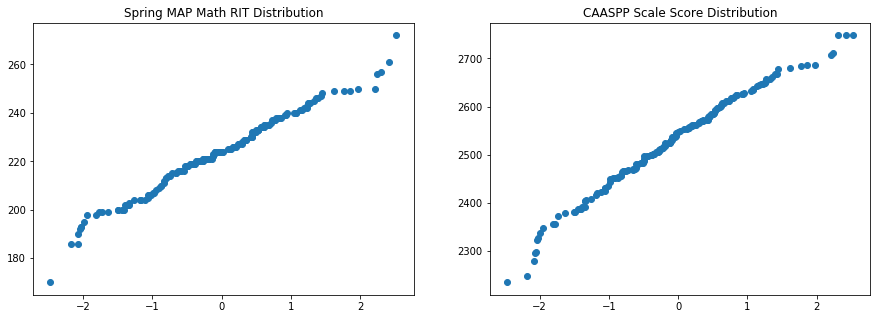

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(norm, map_list, "o")
plt.title('Spring MAP Math RIT Distribution')
plt.subplot(1,2,2)
plt.plot(norm, caaspp_list, "o")
plt.title('CAASPP Scale Score Distribution')

plt.show()

After exploring the distribution of the two variables and seeing that they both resemble a normal distribution; I can consider the mean and standard deviation reliable descriptions of the data when continuing my research.

## Are the CAASPP scores correlated to the Spring MAP scores for all 7th grade students?

Now that I know a little bit more about the distribution of the two variables that I'm focused on, I want to see how they are related. I want to know what the correlation is between spring MAP scores and CAASPP scores. Based on the graph below and the correlation value of 0.91, we can see that there exists a strong linear correlation between spring MAP and CAASPP. 

In [19]:
data["Spring MAP Math RIT"].corr(data['CAASPP Scale Score'])

0.9101697364083047

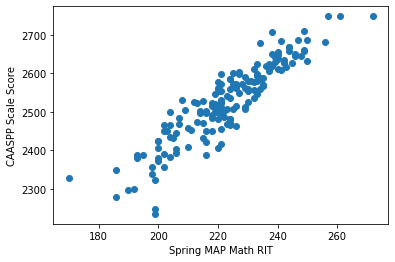

In [20]:
plt.scatter(data["Spring MAP Math RIT"], data['CAASPP Scale Score'])
plt.xlabel('Spring MAP Math RIT')
plt.ylabel('CAASPP Scale Score')
plt.show()

## Are the CAASPP scores of the students with disabilities correlated?

Now, to focus on our students with disabilities. The column, "Accomodations Available Indicator" will have a value of "Yes" for students with disabilities. I'm interested in how many students are included and in which achievement levels they were placed. It turns out, there are 7 students in the lowest achievement level with a score of one. Since the number of students I'm focusing on is such a small amount, I've decided to get more information about the achievement level as opposed to the individual students

In [21]:
accomodation_df = data[data['Accommodations Available Indicator']=='Yes']
accomodation_df.head()

,PermID,CAASPP Scale Score,CAASPP Achievement Level,Spring MAP Math RIT,Spring MAP Math %,Fall MAP Math RIT,Fall MAP Math %,Gender,Section 504 Status,Primary Disability Type,...,CAASPP Achievement Level Reading,Spring MAP Reading RIT,Spring MAP Reading %,Fall MAP Reading RIT,Fall MAP Reading %,Intervention,MAP Math Growth,MAP Reading Growth,Ethnicity,Parent Education
1,89071,2248,1,199,6,190,4,Male,No,OHI,...,1.0,192.0,5.0,190.0,8.0,No,2,-3.0,Black or African American,College graduate
6,88940,2328,1,170,1,150,1,Female,No,AUT,...,1.0,190.0,4.0,175.0,1.0,No,0,3.0,Declined to state,Graduate school or higher
8,88946,2348,1,186,1,180,1,Female,No,SLD,...,1.0,192.0,5.0,194.0,13.0,No,0,-8.0,Declined to state,High school graduate
9,88948,2356,1,198,5,187,2,Female,No,OHI,...,1.0,194.0,7.0,194.0,13.0,No,3,-6.0,Black or African American,College graduate
10,88952,2357,1,202,8,203,17,Female,No,SLD,...,1.0,218.0,56.0,206.0,37.0,No,-9,19.0,White,Graduate school or higher


In [22]:
accomodation_df['CAASPP Achievement Level'].value_counts()

1    7
4    2
2    2
3    1
Name: CAASPP Achievement Level, dtype: int64

We know that there is a correlation between scores overall, but is there a correlation between scores for students in achievement level one?  Knowing that there is a strong correlation between the scores of the entire 7th grade class, I was now curious if there was a correlation within each achievement level. The following results show that for acheivement level 1, there is a moderate correlation. I feel comfortable with narrowing my focus on this subset of students based on this correlation.

In [23]:
for i in range(1,5):
    corr = data[data['CAASPP Achievement Level']==i].corr().loc['Spring MAP Math RIT','CAASPP Scale Score']
    print(f'The correlation between MAP and CAASPP for achievement level {i} is {corr}')

The correlation between MAP and CAASPP for achievement level 1 is 0.6585795965912822
The correlation between MAP and CAASPP for achievement level 2 is 0.31379049142342774
The correlation between MAP and CAASPP for achievement level 3 is 0.2803879025605396
The correlation between MAP and CAASPP for achievement level 4 is 0.7274184383509743


## Are students in level one showing growth? If so, how does it compare to other groups?

Now that we know the two sets of scores are correlated for the group I am concerned about, the next step is figuring out how to improve their scores. Improving scores means growth, so my next question is, "Are students at level 1 growing and how much?" I've ran the summary stats for each achievement level. It's interesting to see that the mean growth increases with each achievement level. While students in the lower levels are generally struggling, they have the most to learn. This shows that achievement level 1 students on average increase MAP scores by about 5 points. According to MAP, students are projected to grow by 6 points from Fall to Spring. In order to accelerate the learning of this group, we need to target their areas of growth based on their Fall MAP scores. For furthering my research, I would like to focus on how to target the needs of the students and to further identify other factors in test scores and growth. 

In [24]:
data.groupby('CAASPP Achievement Level')['MAP Math Growth'].describe()

,count,mean,std,min,25%,50%,75%,max
CAASPP Achievement Level,,,,,,,,
1,47.0,-3.297872,11.236422,-37.0,-10.50,0.0,2.00,18.0
2,46.0,-2.565217,11.906398,-35.0,-7.75,-2.5,3.75,25.0
3,37.0,0.378378,15.035793,-26.0,-12.00,4.0,9.00,41.0
4,37.0,0.027027,7.270513,-17.0,-4.00,0.0,5.00,13.0


I am interested in continuing this research by gathering more data from my students. Not only would I get more data from the same students, but increase the number of classes that I pull from and from previous years. I'm looking forward to learning how to scrape data from website and to clean the data. Until this point, every data set has been in a nice, organized excel file. I would also like to learn about making a model to predict CAASPP score based on MAP scores and possibly growth. It would be even more interesting if I could encorporate a number of other student attributes to impact that prediction. 